In [0]:
#clustering players and teams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
pd.set_option('display.max_columns', 500)

def preprocess(filename):
    df = pd.read_csv(filename)

    names = df['name'].values
    X = df.values[:, 2:]
    X = X/X.max(axis=0)

    #print(df.head())
    return X, names

def h_clusterize(X, names):
    Z = linkage(X, 'ward')
    dendrogram(Z, labels=names, leaf_rotation=90)
    plt.show()
    
    return Z

def clusterize(X, K):
    brain = KMeans(n_clusters=K)
    clusters = brain.fit_predict(X)
    cost = brain.score(X)

    return clusters, cost

def print_clusters(clusters, names, K):
    for i in range(K):
        f = 0
        print('CLUSTER ', i+1, ' -> {', end='')
        for j in range(len(clusters)):
            if i == clusters[j]:
                if f == 0:
                    print(names[j], end='')
                else:
                    print(', ', names[j], end='')
                
                f += 1

        print('}')

def plot_costs_and_ks(filename, K_max):
    X, names = preprocess(filename)
    costs = []
    
    for k in range(1, K_max+1):
        _, cost = clusterize(X, k)
        costs.append(-cost)

    plt.plot(np.arange(1, K_max+1), costs)
    plt.show()

def football2cluster(filename, K):
    X, names = preprocess(filename)
    clusters, _ = clusterize(X, K)
    print_clusters(clusters, names, K)

def football2cluster_hierarchical(filename, threshold):
    X, names = preprocess(filename)
    Z = h_clusterize(X, names)
    clusters = fcluster(Z, threshold, 'distance') - 1
    K = len(set(clusters))
    print_clusters(clusters, names, K)

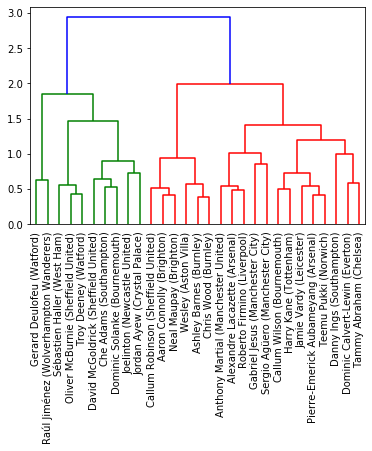

CLUSTER  1  -> {Gerard Deulofeu (Watford),  Raúl Jiménez (Wolverhampton Wanderers)}
CLUSTER  2  -> {Oliver McBurnie (Sheffield United),  Sébastien Haller (West Ham),  Troy Deeney (Watford)}
CLUSTER  3  -> {Che Adams (Southampton),  David McGoldrick (Sheffield United),  Dominic Solanke (Bournemouth),  Joelinton (Newcastle United),  Jordan Ayew (Crystal Palace)}
CLUSTER  4  -> {Aaron Connolly (Brighton),  Ashley Barnes (Burnley),  Callum Robinson (Sheffield United),  Chris Wood (Burnley),  Neal Maupay (Brighton),  Wesley (Aston Villa)}
CLUSTER  5  -> {Alexandre Lacazette (Arsenal),  Anthony Martial (Manchester United),  Gabriel Jesus (Manchester City),  Roberto Firmino (Liverpool),  Sergio Agüero (Manchester City)}
CLUSTER  6  -> {Callum Wilson (Bournemouth),  Harry Kane (Tottenham),  Jamie Vardy (Leicester),  Pierre-Emerick Aubameyang (Arsenal),  Teemu Pukki (Norwich)}
CLUSTER  7  -> {Danny Ings (Southampton),  Dominic Calvert-Lewin (Everton),  Tammy Abraham (Chelsea)}


In [0]:
#football2cluster('striker2cluster.csv', 6)
football2cluster_hierarchical('striker2cluster.csv', 1.1)

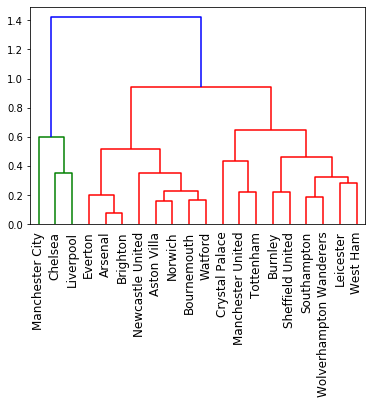

CLUSTER  1  -> {Chelsea,  Liverpool,  Manchester City}
CLUSTER  2  -> {Arsenal,  Aston Villa,  Bournemouth,  Brighton,  Everton,  Newcastle United,  Norwich,  Watford}
CLUSTER  3  -> {Burnley,  Crystal Palace,  Leicester,  Manchester United,  Sheffield United,  Southampton,  Tottenham,  West Ham,  Wolverhampton Wanderers}


In [0]:
#football2cluster('teams2cluster.csv', 5)
football2cluster_hierarchical('teams2cluster_attack.csv', 0.5)

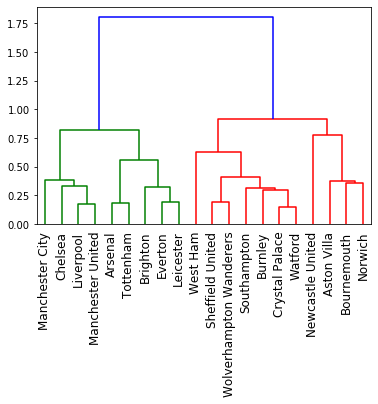

CLUSTER  1  -> {Chelsea,  Liverpool,  Manchester City,  Manchester United}
CLUSTER  2  -> {Arsenal,  Tottenham}
CLUSTER  3  -> {Brighton,  Everton,  Leicester}
CLUSTER  4  -> {Burnley,  Crystal Palace,  Sheffield United,  Southampton,  Watford,  Wolverhampton Wanderers}
CLUSTER  5  -> {West Ham}
CLUSTER  6  -> {Aston Villa,  Bournemouth,  Norwich}
CLUSTER  7  -> {Newcastle United}


In [0]:
football2cluster_hierarchical('teams2cluster_def.csv', 0.5)

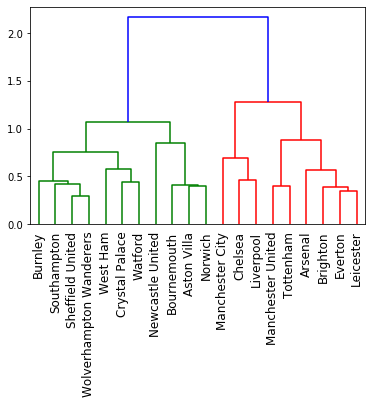

CLUSTER  1  -> {Burnley,  Crystal Palace,  Sheffield United,  Southampton,  Watford,  West Ham,  Wolverhampton Wanderers}
CLUSTER  2  -> {Aston Villa,  Bournemouth,  Newcastle United,  Norwich}
CLUSTER  3  -> {Chelsea,  Liverpool,  Manchester City}
CLUSTER  4  -> {Arsenal,  Brighton,  Everton,  Leicester,  Manchester United,  Tottenham}


In [0]:
football2cluster_hierarchical('teams2cluster.csv', 0.9)

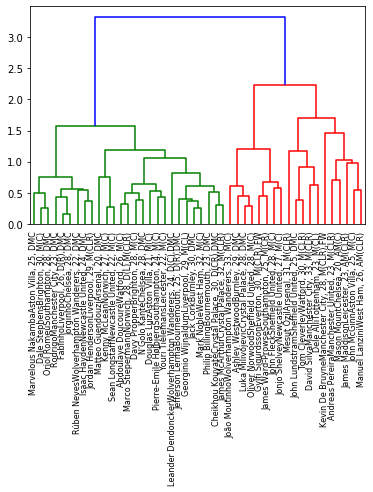

CLUSTER  1  -> {Dale StephensBrighton, 30, M(C),  FabinhoLiverpool, 26, D(R),DMC,  Isaac HaydenNewcastle United, 24, DMC,  Jordan HendersonLiverpool, 29, M(CLR),  JorginhoChelsea, 28, DMC,  Marvelous NakambaAston Villa, 25, DMC,  Oriol RomeuSouthampton, 28, DMC,  RodrigoManchester City, 23, DMC,  Rúben NevesWolverhampton Wanderers, 22, DMC}
CLUSTER  2  -> {Kenny McLeanNorwich, 27, M(C),  Matteo GuendouziArsenal, 20, DMC,  Sean LongstaffNewcastle United, 22, M(C)}
CLUSTER  3  -> {Abdoulaye DoucouréWatford, 26, M(C),  Davy PröpperBrighton, 28, M(C),  Douglas LuizAston Villa, 21, M(C),  Marco StiepermannNorwich, 28, D(L),M(CLR),  N'Golo KantéChelsea, 28, DMC,  Pierre-Emile HøjbjergSouthampton, 24, M(C),  Youri TielemansLeicester, 22, M(C)}
CLUSTER  4  -> {Cheikhou KouyatéCrystal Palace, 30, D(CR),DMC,  Georginio WijnaldumLiverpool, 29, M(CL),  Jack CorkBurnley, 30, DMC,  James McArthurCrystal Palace, 32, M(CLR),  Jefferson LermaBournemouth, 25, D(R),DMC,  Leander DendonckerWolverhampton W

In [0]:
football2cluster_hierarchical('am2cluster.csv', 1)